In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_excel("marketing_campaign.xlsx")
#Seeing entire columns
pd.set_option('display.max_columns', None)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
df['Income'].fillna(df['Income'].median(), inplace=True)

In [4]:
df.drop(columns=['ID','Dt_Customer','Recency','Z_CostContact','Z_Revenue','Complain'], axis=1, inplace=True)

In [5]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,1957,Graduation,Single,58138.0,0,0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0


In [6]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52237.975446,0.444196,0.506250,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107
std,11.984069,25037.955891,0.538398,0.544538,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# code that will add  all columns( MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds) as total amount spent

df['Total_Amount_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df.head()


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Total_Amount_Spent
0,1957,Graduation,Single,58138.0,0,0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,1617
1,1954,Graduation,Single,46344.0,1,1,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,27
2,1965,Graduation,Together,71613.0,0,0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,776
3,1984,Graduation,Together,26646.0,1,0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,53
4,1981,PhD,Married,58293.0,1,0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,422


In [8]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Total_Amount_Spent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52237.975446,0.444196,0.506250,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,605.798214
std,11.984069,25037.955891,0.538398,0.544538,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,602.249288
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,1959.000000,35538.750000,0.000000,0.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.750000
50%,1970.000000,51381.500000,0.000000,0.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,396.000000
75%,1977.000000,68289.750000,1.000000,1.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1045.500000
max,1996.000000,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000


In [9]:
df.shape

(2240, 24)

In [10]:
df.drop(columns=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'], axis=1, inplace=True)

In [11]:
df.shape

(2240, 18)

In [12]:
# separating continious variables and categorical variables as separate datafame

categorical_vars = df.select_dtypes(include=["object"])

continuous_vars = df.select_dtypes(include=["int64", "float64"])

In [13]:
categorical_vars.head(20)

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
5,Master,Together
6,Graduation,Divorced
7,PhD,Married
8,PhD,Together
9,PhD,Together


In [14]:
continuous_vars.head()

,Year_Birth,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Total_Amount_Spent
0,1957,58138.0,0,0,3,8,10,4,7,0,0,0,0,0,1,1617
1,1954,46344.0,1,1,2,1,1,2,5,0,0,0,0,0,0,27
2,1965,71613.0,0,0,1,8,2,10,4,0,0,0,0,0,0,776
3,1984,26646.0,1,0,2,2,0,4,6,0,0,0,0,0,0,53
4,1981,58293.0,1,0,5,5,3,6,5,0,0,0,0,0,0,422


In [15]:
categorical_vars['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [16]:
categorical_vars['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [17]:
#Label Encoding the obj Dtypes(categorical Data)
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for column in categorical_vars.select_dtypes(include=["object"]):
    categorical_vars[column] = LE.fit_transform(categorical_vars[column])
categorical_vars.head(2)

,Education,Marital_Status
0,2,4
1,2,4


Education --> 2n Cycle(0),Basic(1),Graduation(2),master(3), Phd(4)     
Living Status --> Absurd(0),Alone(1),Divorced(2),Married(3),Single(4),Togrther(5),Widow(6),Yolo(7)

In [18]:
categorical_vars['Marital_Status'].value_counts()

Marital_Status
3    864
5    580
4    480
2    232
6     77
1      3
0      2
7      2
Name: count, dtype: int64

In [19]:
df.to_csv("Final_Sheet.csv")

In [20]:
#entire data frame standardization for Continious Data

import pandas as pd
scaler = StandardScaler()
scaled_df = scaler.fit_transform(continuous_vars)
continuous_vars = pd.DataFrame(scaled_df, columns=continuous_vars.columns)
continuous_vars.head()


,Year_Birth,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Total_Amount_Spent
0,-0.985345,0.235696,-0.825218,-0.929894,0.349414,1.409304,2.510890,-0.550785,0.693904,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,2.388846,1.679417
1,-1.235733,-0.235454,1.032559,0.906934,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.418612,-0.961275
2,-0.317643,0.773999,-0.825218,-0.929894,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.418612,0.282673
3,1.268149,-1.022355,1.032559,-0.929894,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.418612,-0.918094
4,1.017761,0.241888,1.032559,-0.929894,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.418612,-0.305254


In [21]:
x=continuous_vars.iloc[:,0:16]
x.head()

,Year_Birth,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Total_Amount_Spent
0,-0.985345,0.235696,-0.825218,-0.929894,0.349414,1.409304,2.510890,-0.550785,0.693904,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,2.388846,1.679417
1,-1.235733,-0.235454,1.032559,0.906934,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.418612,-0.961275
2,-0.317643,0.773999,-0.825218,-0.929894,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.418612,0.282673
3,1.268149,-1.022355,1.032559,-0.929894,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.418612,-0.918094
4,1.017761,0.241888,1.032559,-0.929894,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.418612,-0.305254


In [22]:
x.shape

(2240, 16)

In [23]:
from sklearn.decomposition import PCA

#pca = PCA(n_components=2)
pca = PCA()
pca.fit(x)
SS_x_pca = pca.transform(x)

In [24]:
#Printing inertias
SS_x_pca

array([[ 2.22359242, -0.14819772,  0.92235476, ..., -0.26760772,
        -0.74725963, -0.08405759],
       [-1.83981707, -0.38972487, -0.311415  , ..., -0.22901716,
        -0.16426638, -0.01467364],
       [ 1.38371518, -0.5745831 , -1.14500204, ...,  0.12072537,
         0.55000076,  0.22745901],
       ...,
       [ 1.64217863,  0.55318198, -0.00261199, ...,  0.97195717,
        -0.79309821, -0.12815252],
       [ 1.67495516, -1.75793264, -0.90484855, ..., -0.23290612,
        -0.21072333,  0.33793154],
       [-1.12280621, -0.25787747,  1.44331551, ...,  0.13986166,
        -0.39207433,  0.15639058]])

In [25]:
#making data frame
pc_data = pd.DataFrame(SS_x_pca)
pc_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2.223592,-0.148198,0.922355,-1.580256,0.315303,-0.530681,-1.458344,-2.234368,0.838667,0.725818,0.695068,-0.150513,1.558566,-0.267608,-0.747260,-0.084058
1,-1.839817,-0.389725,-0.311415,1.023948,1.293674,-0.697652,0.832281,-0.284266,-0.093443,0.001218,0.173211,0.309400,0.147321,-0.229017,-0.164266,-0.014674
2,1.383715,-0.574583,-1.145002,-0.235763,-0.476051,0.520780,-1.032917,0.139211,0.490264,-0.566961,0.248841,0.882061,-0.578329,0.120725,0.550001,0.227459
3,-2.198426,1.210403,-0.432149,-0.085450,-1.007788,0.151784,0.128261,0.095753,0.040510,-0.028415,0.042346,-0.052580,-0.305911,-0.220314,0.139286,0.033744
4,-0.578471,-0.086069,0.067375,-0.891341,-1.624694,0.057532,0.918542,-0.336118,0.018080,0.090444,0.526213,0.265423,0.009623,-0.163274,0.702069,0.240306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.977243,-1.346723,-0.148110,-0.276922,0.017397,0.200209,-0.705186,0.368798,0.265442,-0.558511,-0.449561,0.431543,1.221491,-0.628338,-0.011792,-0.966785
2236,-0.243573,-1.465598,2.724423,-0.053714,-0.023031,-2.924879,2.321659,1.452039,2.549864,0.108955,1.351208,1.359240,-0.374600,-0.596499,0.366299,0.075126
2237,1.642179,0.553182,-0.002612,1.507399,-1.998060,0.918379,-1.369567,0.860459,-1.874338,1.557967,0.767722,-0.199769,-1.310859,0.971957,-0.793098,-0.128153
2238,1.674955,-1.757933,-0.904849,0.167758,0.551664,0.227152,0.033012,-0.041008,0.131357,-0.045594,-0.130562,0.077676,-0.365931,-0.232906,-0.210723,0.337932


In [26]:
#Variance ratio interms of percentage
d2=pca.explained_variance_ratio_
d3=pd.DataFrame(d2)*100
d3

,0
0,28.839754
1,12.234974
2,10.181175
3,7.582526
4,6.475411
5,5.236148
6,4.489522
7,4.112636
8,3.905412
9,3.473862


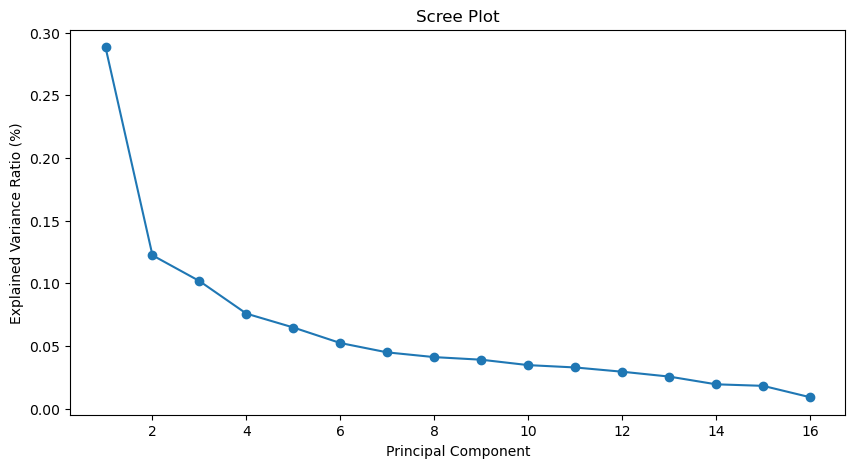

In [27]:
import matplotlib.pyplot as plt
# Scree plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, x.shape[1] + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio (%)')
plt.title('Scree Plot')
plt.show()

In [28]:
x_new_pca=pc_data.iloc[:,0:2]
x_new_pca.head()

,0,1
0,2.223592,-0.148198
1,-1.839817,-0.389725
2,1.383715,-0.574583
3,-2.198426,1.210403
4,-0.578471,-0.086069


In [29]:
x_new_pca.shape

(2240, 2)

In [30]:
categorical_vars

,Education,Marital_Status
0,2,4
1,2,4
2,2,5
3,2,5
4,4,3
...,...,...
2235,2,3
2236,4,5
2237,2,2
2238,3,5


In [31]:
#concatinating two data frames

import pandas as pd
x_new = pd.concat([x_new_pca, categorical_vars], axis=1, ignore_index=True)
x_new.head()

,0,1,2,3
0,2.223592,-0.148198,2,4
1,-1.839817,-0.389725,2,4
2,1.383715,-0.574583,2,5
3,-2.198426,1.210403,2,5
4,-0.578471,-0.086069,4,3


In [32]:
x_new.shape

(2240, 4)

In [33]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x_new)

  wcss.append(kmeans.inertia_)

  File "C:\Users\mahendhar Baira\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\mahendhar Baira\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mahendhar Baira\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\mahendhar Baira\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [35]:
kmeans.inertia_

5118.0852149402235

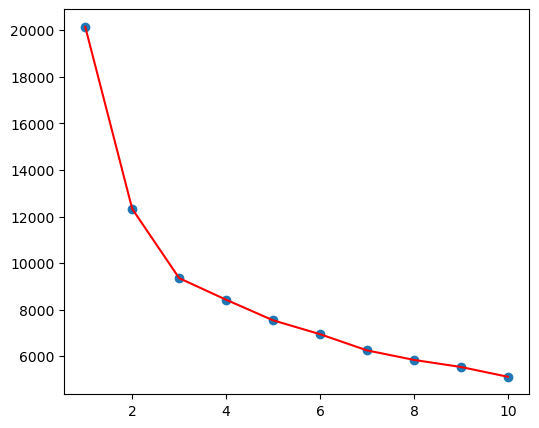

In [36]:
#seeing clusters in Elbow plot
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.scatter(range(1,11),wcss)
plt.plot(range(1,11),wcss,color='red')
plt.show()

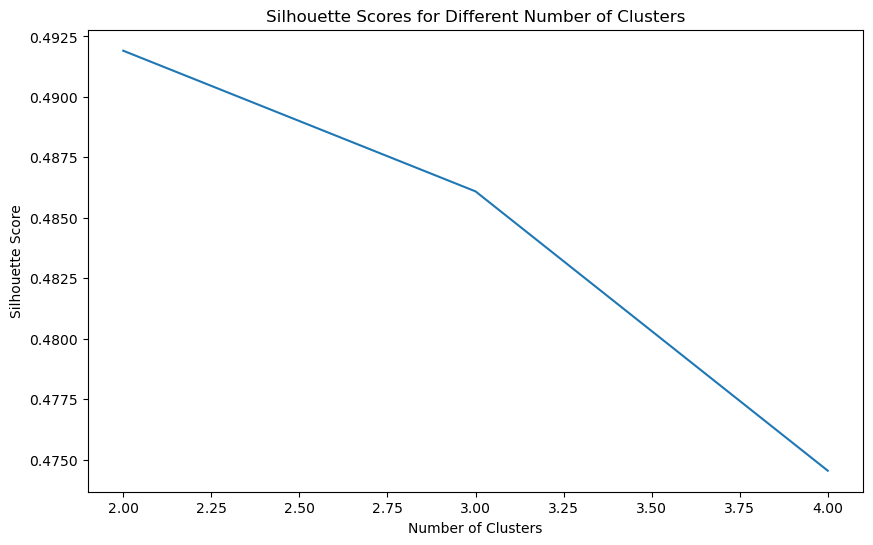

In [37]:
# using silhouette score

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
silhouette_scores = []

for i in range(2, x_new.shape[1] + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x_new_pca)
    silhouette_scores.append(silhouette_score(x_new_pca, kmeans.labels_))

# Plot the silhouette scores for each number of clusters
plt.figure(figsize=(10,6))
plt.plot(range(2, x_new.shape[1] + 1), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.show()

In [38]:
# Taking 3 clusters

from sklearn.cluster import KMeans
clusters=KMeans(n_init=20,n_clusters=3)
Y=clusters.fit_predict(x_new)
Y=pd.DataFrame(Y)
Y.value_counts()

2    992
0    835
1    413
Name: count, dtype: int64

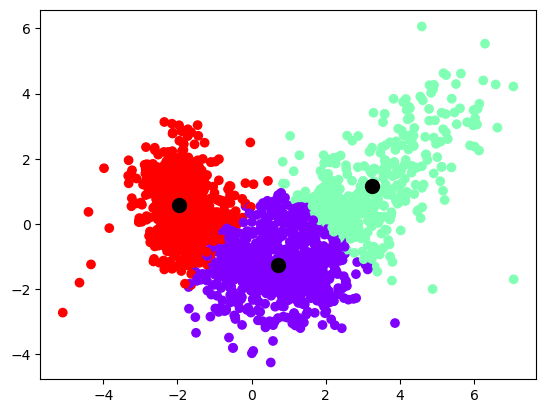

In [39]:
# Scatter plot for 1st two cols
import matplotlib.pyplot as plt
plt.scatter(x_new.iloc[:,0],x_new.iloc[:,1],c=clusters.labels_,cmap="rainbow")
# plotting the centroids
plt.scatter(clusters.cluster_centers_[:,0], clusters.cluster_centers_[:,1], s=100, c='black', label='Centroids')

In [40]:
x_new["Target"]=Y
x_new.head()

,0,1,2,3,Target
0,2.223592,-0.148198,2,4,1
1,-1.839817,-0.389725,2,4,2
2,1.383715,-0.574583,2,5,0
3,-2.198426,1.210403,2,5,2
4,-0.578471,-0.086069,4,3,0


In [41]:
y=x_new["Target"]
x=x_new.iloc[:,0:4]
x.head()

,0,1,2,3
0,2.223592,-0.148198,2,4
1,-1.839817,-0.389725,2,4
2,1.383715,-0.574583,2,5
3,-2.198426,1.210403,2,5
4,-0.578471,-0.086069,4,3


In [42]:
#Random forest classifier

import numpy as np
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30)
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=100,max_features=0.7,max_samples=0.6)
RF_clf.fit(X_train, Y_train)
Y_pred_train=RF_clf.predict(X_train)
Y_pred_test=RF_clf.predict(X_test)
from sklearn.metrics import accuracy_score
train_accuracy= accuracy_score(Y_train,Y_pred_train)
test_accuracy = accuracy_score(Y_test,Y_pred_test)
print("training accuracy score=",train_accuracy.round(2))
print("testing accuracy score=",test_accuracy.round(2))

AttributeError: 'float' object has no attribute 'round'

In [43]:
#Random forest classifier cross validation

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=100,max_features=0.7,max_samples=0.6)
training_accuracy=[]
test_accuracy=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RF_clf.fit(X_train,Y_train)
    Y_pred_train=RF_clf.predict(X_train)
    Y_pred_test=RF_clf.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("cross validation training accuracy score=",np.mean(training_accuracy).round(3))
print("cross validation test accuracy score=",np.mean(test_accuracy).round(3))

cross validation training accuracy score= 1.0
cross validation test accuracy score= 0.981


In [44]:
# Create a DataFrame to store the scores
t2 = pd.DataFrame({
    'Model': ['Random forest classifier'],
    'Training Accuracy': [np.mean(training_accuracy).round(3)],
    'Test Accuracy': [np.mean(test_accuracy).round(3)]
}, index=[2])

# Print the DataFrame
print(t2.to_string())

                      Model  Training Accuracy  Test Accuracy
2  Random forest classifier                1.0          0.981


## With out **PCA** and with out **Standardization**

In [45]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Total_Amount_Spent
0,1957,Graduation,Single,58138.0,0,0,3,8,10,4,7,0,0,0,0,0,1,1617
1,1954,Graduation,Single,46344.0,1,1,2,1,1,2,5,0,0,0,0,0,0,27
2,1965,Graduation,Together,71613.0,0,0,1,8,2,10,4,0,0,0,0,0,0,776
3,1984,Graduation,Together,26646.0,1,0,2,2,0,4,6,0,0,0,0,0,0,53
4,1981,PhD,Married,58293.0,1,0,5,5,3,6,5,0,0,0,0,0,0,422


In [46]:
#Label Encoding the obj Dtypes
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for column in df.select_dtypes(include=["object"]):
    df[column] = LE.fit_transform(df[column])
df.head()


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Total_Amount_Spent
0,1957,2,4,58138.0,0,0,3,8,10,4,7,0,0,0,0,0,1,1617
1,1954,2,4,46344.0,1,1,2,1,1,2,5,0,0,0,0,0,0,27
2,1965,2,5,71613.0,0,0,1,8,2,10,4,0,0,0,0,0,0,776
3,1984,2,5,26646.0,1,0,2,2,0,4,6,0,0,0,0,0,0,53
4,1981,4,3,58293.0,1,0,5,5,3,6,5,0,0,0,0,0,0,422


In [47]:
x_new=df.iloc[:,:]
x_new.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Total_Amount_Spent
0,1957,2,4,58138.0,0,0,3,8,10,4,7,0,0,0,0,0,1,1617
1,1954,2,4,46344.0,1,1,2,1,1,2,5,0,0,0,0,0,0,27
2,1965,2,5,71613.0,0,0,1,8,2,10,4,0,0,0,0,0,0,776
3,1984,2,5,26646.0,1,0,2,2,0,4,6,0,0,0,0,0,0,53
4,1981,4,3,58293.0,1,0,5,5,3,6,5,0,0,0,0,0,0,422


In [48]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x_new)

  wcss.append(kmeans.inertia_)

In [49]:
kmeans.inertia_

24318622093.017868

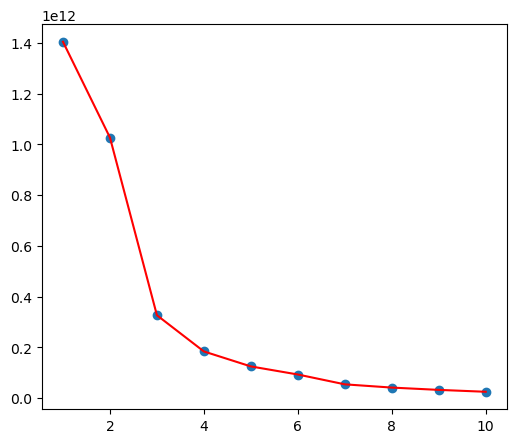

In [50]:
#seeing clusters in Elbow plot
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.scatter(range(1,11),wcss)
plt.plot(range(1,11),wcss,color='red')
plt.show()

##### If we observe the above the Elbow Plot it seems there is a rapid change in curve from 0-2, but after 4th point it seems less variation. So in my point of view it is good to go with No of Clusters = 4

In [51]:
# Taking 3 clusters

from sklearn.cluster import KMeans
clusters=KMeans(n_init=20,n_clusters=4)
Y=clusters.fit_predict(x_new)
Y=pd.DataFrame(Y)
Y.value_counts()

0    809
3    743
1    687
2      1
Name: count, dtype: int64

In [52]:
x_new["Target"]=Y
x_new.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Total_Amount_Spent,Target
0,1957,2,4,58138.0,0,0,3,8,10,4,7,0,0,0,0,0,1,1617,0
1,1954,2,4,46344.0,1,1,2,1,1,2,5,0,0,0,0,0,0,27,0
2,1965,2,5,71613.0,0,0,1,8,2,10,4,0,0,0,0,0,0,776,1
3,1984,2,5,26646.0,1,0,2,2,0,4,6,0,0,0,0,0,0,53,3
4,1981,4,3,58293.0,1,0,5,5,3,6,5,0,0,0,0,0,0,422,0


In [53]:
x_new.to_csv("With_Clusters.csv")

In [54]:
y=x_new["Target"]
x=x_new.iloc[:,0:-1]
x.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Total_Amount_Spent
0,1957,2,4,58138.0,0,0,3,8,10,4,7,0,0,0,0,0,1,1617
1,1954,2,4,46344.0,1,1,2,1,1,2,5,0,0,0,0,0,0,27
2,1965,2,5,71613.0,0,0,1,8,2,10,4,0,0,0,0,0,0,776
3,1984,2,5,26646.0,1,0,2,2,0,4,6,0,0,0,0,0,0,53
4,1981,4,3,58293.0,1,0,5,5,3,6,5,0,0,0,0,0,0,422


In [57]:
#Random forest classifier

import numpy as np
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30)
from sklearn.ensemble import RandomForestClassifier
RF_clf_t = RandomForestClassifier(n_estimators=100,max_features=0.7,max_samples=0.6)
RF_clf_t.fit(X_train, Y_train)
Y_pred_train=RF_clf_t.predict(X_train)
Y_pred_test=RF_clf_t.predict(X_test)
from sklearn.metrics import accuracy_score
train_accuracy= accuracy_score(Y_train,Y_pred_train)
test_accuracy = accuracy_score(Y_test,Y_pred_test)
print("training accuracy score=",train_accuracy)
print("testing accuracy score=",test_accuracy)

training accuracy score= 0.9993622448979592
testing accuracy score= 1.0


In [58]:
#Random forest classifier cross validation

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
RF_clf_t = RandomForestClassifier(n_estimators=100,max_features=0.7,max_samples=0.6)
training_accuracy=[]
test_accuracy=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RF_clf_t.fit(X_train,Y_train)
    Y_pred_train=RF_clf_t.predict(X_train)
    Y_pred_test=RF_clf_t.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("cross validation training accuracy score=",np.mean(training_accuracy).round(3))
print("cross validation test accuracy score=",np.mean(test_accuracy).round(3))

cross validation training accuracy score= 1.0
cross validation test accuracy score= 0.999


In [59]:
# Converting to pickle file
import pickle
filename="Trained_model.pkl"
pickle.dump(RF_clf_t,open(filename,"wb"))

In [60]:
#Prediction
loaded_model=pickle.load(open("Trained_model.pkl","rb"))

#Input Data
input_data = (1957,2,4,58138.0,0,0,3,8,10,4,7,0,0,0,0,0,1,1617)
input_data_np=np.asarray(input_data)
input_data_reshaped = input_data_np.reshape(1,-1)
prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

[0]
